# Ejercicio de Clasificación Modelo Deserción Universidad

Descripción de los datos:
* cant_semestres: cantidad de semestres estudiados hasta deserción
* sexo: F, M
* prom_notas_semestre: promedio de todos los cursos llevados por semestre
* prom_inasistencias: promedio de inasistencias por semestre
* cursos_reprobados: cursos reprobados en el semestre
* desercion: 1 si 0 no


**Objetivo**: predecir la deserción de los estudiantes, variable: **desercion**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtener Datos

In [2]:
url = "https://raw.githubusercontent.com/eduardool/MaestriaCienciaDatos/main/datasets/desercion.csv"
datos = pd.read_csv(url)

In [3]:
datos.head()

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
0,0,F,9.332000,8.800000,3,0
1,0,F,11.606000,14.600000,1,0
2,0,M,15.052500,11.375000,0,0
3,0,M,9.261666,17.666666,4,0
4,0,M,12.985000,8.666667,2,0


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cant_semestres       4500 non-null   int64  
 1   sexo                 4500 non-null   object 
 2   prom_notas_semestre  4500 non-null   float64
 3   prom_inasistencias   4500 non-null   float64
 4   cursos_reprobados    4500 non-null   int64  
 5   desercion            4500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 211.1+ KB


## Análisis Exploratorio de Datos

<AxesSubplot:xlabel='desercion', ylabel='count'>

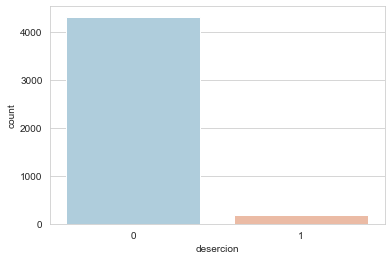

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='desercion',data=datos,palette='RdBu_r')

<AxesSubplot:xlabel='desercion', ylabel='count'>

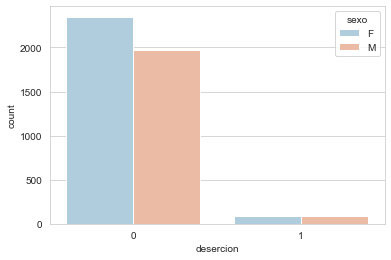

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='desercion',hue='sexo',data=datos,palette='RdBu_r')

**Hacer más análisis exploratorio**

### Separar los datos

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
datos.columns

Index(['cant_semestres', 'sexo', 'prom_notas_semestre', 'prom_inasistencias',
       'cursos_reprobados', 'desercion'],
      dtype='object')

**Transformación de Variables Categóricas**

In [9]:
carac_cat = ['sexo']
datos = pd.get_dummies(datos,columns=carac_cat,drop_first=True)

#sexo = pd.get_dummies(datos['sexo'],drop_first=True)
#datos.drop(['sexo'],axis=1,inplace=True)
#datos = pd.concat([datos,sexo],axis=1)

In [10]:
datos.head()

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion,sexo_M
0,0,9.332000,8.800000,3,0,0
1,0,11.606000,14.600000,1,0,0
2,0,15.052500,11.375000,0,0,1
3,0,9.261666,17.666666,4,0,1
4,0,12.985000,8.666667,2,0,1


In [11]:
X = datos[['cant_semestres', 'prom_notas_semestre', 'prom_inasistencias','cursos_reprobados', 'sexo_M']] #
y = datos['desercion']

In [12]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba  = train_test_split(X, y, test_size=0.1, random_state=42)

# Selección de Clasificadores con Cross Validation


## 1. SVM

In [13]:
from sklearn.svm import SVC
clasificador_SVM = SVC(random_state=42)


## Cross Validation - SVM

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clasificador_SVM, X_entrenamiento,y_entrenamiento, cv=5, scoring='f1_macro') # validación cruzada de 5 folds
print("F1 promedio de %0.2f y desviación estandar de  %0.2f" % (scores.mean(), scores.std()))


F1 promedio de 0.80 y desviación estandar de  0.03


## 2. Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
clasificador_rf = RandomForestClassifier(random_state=42)

## Cross Validation - RandomForest


In [16]:
scores = cross_val_score(clasificador_rf, X_entrenamiento,y_entrenamiento, cv=5, scoring='f1_macro') # validación cruzada de 5 folds
print("F1 promedio de %0.2f y desviación estandar de  %0.2f" % (scores.mean(), scores.std()))


F1 promedio de 0.89 y desviación estandar de  0.02


## El mejor modelo es Random Forest!, se hace afinamiento de este modelo

## Afinamiento usando GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100], 'max_features': [1, 3, 5]}
grid = GridSearchCV(clasificador_rf,param_grid,refit=True,verbose=2)# afinamiento de Random Forest!
grid.fit(X_entrenamiento,y_entrenamiento)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................max_features=1, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.4s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.3s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.3s
[CV] END ...................max_features=1, n_est

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [1, 3, 5],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

## Reporte Final Conjunto de Prueba

In [ ]:
modelo_final = grid.best_estimator_

In [ ]:
pred_grid = modelo_final.predict(X_prueba)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_prueba,pred_grid))

[[430   1]
 [  4  15]]


In [ ]:
print(classification_report(y_prueba,pred_grid))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       431
           1       0.94      0.79      0.86        19

    accuracy                           0.99       450
   macro avg       0.96      0.89      0.93       450
weighted avg       0.99      0.99      0.99       450

